# <font color='red'>MNIST - Part 1: understanding metrics</font>

# <font color='blue'>A. Set-up, import the data, explore the data


Import modules.

In [1]:
#numpy
import numpy as np

#sklearn
import sklearn

# matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Import the data.

In [2]:
#NOTE: this might take a while..

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

['target', 'DESCR', 'feature_names', 'url', 'data', 'categories', 'details']

Prepare feature matrix `X` and label vector `y`. 

In [3]:
X, y = mnist["data"], mnist["target"]

Explore them.

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
28*28

784

In [7]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

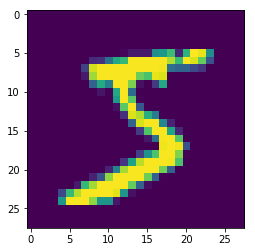

In [8]:
# this cell is just to display some digits, in a way.
# Do not pay too much attention to how this is done.

#plot the first image in the dataset
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)

# try changing i in X[i] to display other numbers

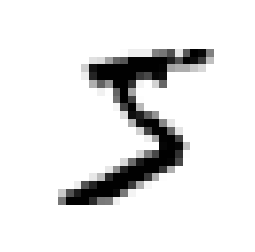

In [9]:
# this cell is just to display some digits, in a different way.
# Do not pay too much attention to how this is done.

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

# try changing i in X[i] to display other numbers

As expected, the label for this is:

In [10]:
y[0]

'5'

Which is a string:

In [11]:
type(y[0])

str

For sure I want to cast all these into integers:

In [12]:
y = y.astype(np.uint8)
y[0]

5

In [13]:
type(y[0])

numpy.uint8

# <font color='blue'>B. Train-test splitting

Apply a static TT splitting.

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
X_train.shape

(60000, 784)

In [16]:
X_test.shape

(10000, 784)

In [17]:
y_train.shape

(60000,)

In [18]:
y_test.shape

(10000,)

( *Note: you may want to do much better that this - see later..* )

# <font color='blue'>C. Build a binary classifier: a "5-detector"

Create the label vectors (for both the train and test set):

In [19]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [20]:
y_train_5.shape

(60000,)

In [21]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
y_train_5   #this has become a label vector for a binary classifier (a 5-detector)

array([ True, False, False, ...,  True, False, False])

Pick a Stochastic Gradient Descent classifier, a decent choice if you need to handle very large datasets efficiently.

In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

# hyperparameters set to future default values in future versions on sklearn, so to avoid warnings. 
# No need to pay too much attention to this.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

I know that X[0] is a 5, X[1] is a 0, X[2] is a 4:

In [24]:
print "y[0] =", y[0]
print "y[1] =", y[1]
print "y[2] =", y[2]

y[0] = 5
y[1] = 0
y[2] = 4


Let's check if the classifier we built above works for these 3 examples:

In [25]:
sgd_clf.predict([X[0]]) # X[0] is a 5 --> TRUE

array([ True])

In [26]:
sgd_clf.predict([X[1]]) # X[1] is a 0, so NOT a 5 --> FALSE

array([False])

In [27]:
sgd_clf.predict([X[2]]) # X[2] is a 4, so NOT a 5 --> FALSE

array([False])

OK, it works!

So, how accurate is this model?

# <font color='blue'>D. Compute the accuracy of the model

We opted for a train-test split, so most rapid is to ask for the score in this way:

In [28]:
sgd_clf.score(X_test, y_test_5)

0.958

( *Actually, k-fold cross-validation, as discussed at last lecture, would be similar or better - and would also allow you to get insight on its variance. Let's try it out.* )

Use `cross_val_score()` function in sklearn to evaluate your SGDClassifier model using k-fold cross-validation, with k=3, i.e. make k trainings: split the training set into k folds, train and make predictions and evaluate them on each fold using a model trained on the remaining folds.

In [29]:
y_5 = (y == 5)
y_5.shape

(70000,)

In [30]:
%%time
from sklearn.model_selection import cross_val_score
print cross_val_score(sgd_clf, X, y_5, cv=3, scoring="accuracy")

# this trigger the training of cv=3 models, so it might take a while to complete!

[0.96554384 0.9651995  0.96352805]
CPU times: user 39.6 s, sys: 520 ms, total: 40.2 s
Wall time: 39.9 s


If you arrived here, hold on a second, think about what you did, and think if it is a solidly high accuracy qhat you got here.. before moving on.

# <font color='blue'>E. Find a better performance metric for the model

Use `cross_val_predict()` and `confusion_matrix()`:
* `cross_val_predict()` is similar to `cross_val_score()`: it performs K-fold CV but returns not the evaluation score, but the predictions made on each fold
* then, give the target classes (`y_5`) and the predicted classes (`y_pred`) to `confusion_matrix()`

In [31]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(sgd_clf, X, y_5, cv=3)

# this trigger the training of cv=3 models, so it might take a while to complete!

In [32]:
type(y_pred)

numpy.ndarray

In [33]:
y_pred.shape

(70000,)

In [34]:
y_pred

array([ True, False, False, ..., False,  True, False])

In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_5, y_pred)

array([[62736,   951],
       [ 1516,  4797]])

If you arrived here, hold on a second, and wait for an explanation in class!

--2021-05-20 03:34:12--  http://bonacor.web.cern.ch/bonacor/SC_AA1920/images/ConfusionMatrix.png
Resolving bonacor.web.cern.ch (bonacor.web.cern.ch)... 188.184.101.169
Connecting to bonacor.web.cern.ch (bonacor.web.cern.ch)|188.184.101.169|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://bonacor.web.cern.ch/SC_AA1920/images/ConfusionMatrix.png [following]
--2021-05-20 03:34:13--  https://bonacor.web.cern.ch/SC_AA1920/images/ConfusionMatrix.png
Connecting to bonacor.web.cern.ch (bonacor.web.cern.ch)|188.184.101.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79929 (78K) [image/png]
Saving to: ‘ConfusionMatrix.png’

ConfusionMatrix.png 100%[===================>]  78.06K   144KB/s    in 0.5s    

2021-05-20 03:34:15 (144 KB/s) - ‘ConfusionMatrix.png’ saved [79929/79929]



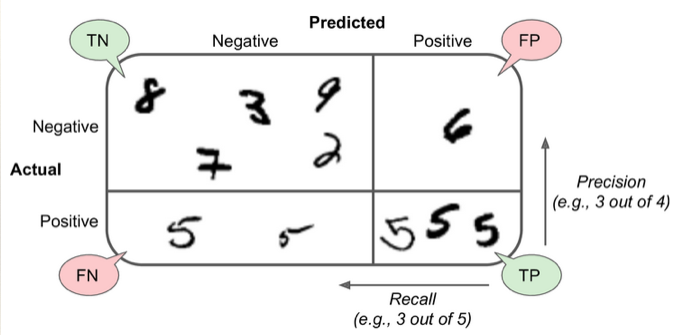

In [36]:
!wget http://bonacor.web.cern.ch/bonacor/SC_AA1920/images/ConfusionMatrix.png
from IPython.display import Image
Image(filename='/content/ConfusionMatrix.png')

Other possible metrics are **precision** and **recall**, and often also the **F1** score:

In [37]:
from sklearn.metrics import precision_score
precision_score(y_5, y_pred)

0.8345511482254697

In [38]:
from sklearn.metrics import recall_score
recall_score(y_5, y_pred)

0.7598606051005861

In [39]:
from sklearn.metrics import f1_score
f1_score(y_5, y_pred)

0.7954564298151066

In [ ]:
#create an array with, de-facto, the class probabilities
y_scores = cross_val_predict(sgd_clf, X, y_5, cv=3,
                             method="decision_function")

In [ ]:
y_scores

In [ ]:
y_5

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_5, y_scores)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            
    
plt.figure(figsize=(8, 6))                         
plot_roc_curve(fpr, tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_5, y_scores)

You can state your AUC score is roughly 96%, when comparing your work with others'. It is a good result!

# Want to do more?

You could achieve even better results via an ensemble method. Try e.g. `RandomForestClassifier`.
* documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html